In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats
%matplotlib inline

Read in data from SEC column molecular weight standards:

In [2]:
df = pd.read_csv('Superdex200ReferenceMWstandard.csv')
df.dropna(inplace=True)
df

,Date,Molecular Weight,ml
0,8/23/18,669000,9.037
1,8/23/18,440000,10.202
2,8/23/18,158000,12.504
3,8/23/18,75000,14.046
4,8/23/18,44000,14.772
5,8/23/18,29000,16.278
6,8/23/18,13700,17.744
7,8/24/18,669000,9.096
10,8/24/18,75000,14.192
11,8/24/18,44000,15.115


In [3]:
##code to try to read in multiple different dataframes. Never got it working.
#pd.concat([df, df2])
#df.append(df2)
#df.dropna(inplace=True)

Plot the standard curve:

/Users/Ryan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


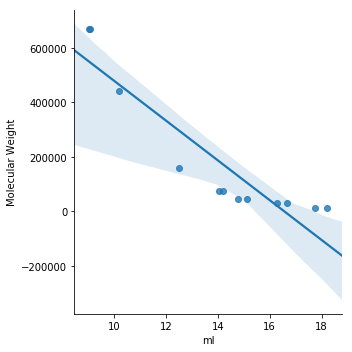

In [4]:
sns.lmplot(x='ml',y='Molecular Weight',data=df)

Define variables for determining coefficients from linear regression

In [5]:
X = df['Molecular Weight']
y = df['ml']

One method for determining slope and intercept. Uses least squares regression from scipy library

In [6]:
## scipys stats.linregress: slope, intercept, r_value, p_value, 
## std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

In [7]:
stats.linregress(X,y)

LinregressResult(slope=-1.1522820174439389e-05, intercept=16.157721658510695, rvalue=-0.9174668292815311, pvalue=2.622389634688797e-05, stderr=1.5799618761283546e-06)

In [14]:
#required for sklearn fit function I guess? 

X = X.values.reshape(-1, 1)
y = y.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# The coefficients
# Should be very similar values to scipy method
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)


Coefficients: 
 [-1.15228202e-05]
Intercept: 
 16.157721658510695


input protein molecular weight (in daltons) to predict SEC retention (in ml):

note: more correctly this should measure size, not molecular weight. This measurement will be effected by protein shape and interactions with the SEC column. 

In [17]:
#put protein MW in parntheses 
protein_retention = lm.predict(65000)
protein_retention



ValueError: Expected 2D array, got scalar array instead:
array=65000.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Reverses previous relationship
input peak retention volume from SES run (in ml) to predict molecular weight of protein (in daltons):

note: more correctly this should measure size, not molecular weight. This measurement will be effected by protein shape and interactions with the SEC column. 

In [18]:
lm.fit(y,X)

#put peak retention volume in parentheses 
protein_size = lm.predict(21)
protein_size

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.037 10.202 12.504 14.046 14.772 16.278 17.744  9.096 14.192 15.115
 16.649 18.223].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)